<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/Copy_of_M3_MP5_NB_HR_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project 5 : HR Analytics - Attrition

## Learning Objectives

At the end of the mini project, you will be able to -

* Get an understanding of the dataset.
* Perform Extensive EDA and Visualizations
* Handraft the raw data suitable for a ML problem
* Predict(Classify) the employee Attrition based on employee performance


Perform Exhaustive EDA and engineer the features to build a model on a training data that predicts (Classifies) whether an employee (from a test dataset) will quit the company or not.


## Information

### HR Analytics

In any organization, Human Resources (HR) plays the role of a backbone. The strength of the comapny's performance is dependant on the people who make up the various roles and departments. So, it is vital to monitor and make business decisions based on the employees' data.


HR Analytics is one of the latest yet a powerful domain that used the Data Science and Machine Learning. HR analytics is a broad term and has mutiple applications including, but not limited to the following

- Performance Analysis
- Attrition Analysis and Prediction
- Hiring Analytics
- Employee satisfaction and perk recommendation
- Skills assesment and team restructuring


### About the Dataset

This Mini-Project uses the Dataset from the [Kaggle Link](https://www.kaggle.com/code/whale9490/ibm-hr-analytics-employee-attrition-performance).

This Mini-Project is based on the HR Analytics.
The goal of this project is to use the above dataset to study the performance and predict the disssatisfied Employees who are most probable to quit the company.

We have 1470 employees data with 35 fields that are self-explanatory. 
The fields (variables) are a mix of categorical and numerical data.

Except the `Attrition`, all other fields are feature variables. The fields are sorted in alphabetical order as follows:

- `Age`
- **`Attrition`** - *TARGET VARIABLE*
- `BusinessTravel`
- `DailyRate`
- `Department`
- `DistanceFromHome`
- `Education`
- `EducationField`
- `EmployeeCount`,
- `EmployeeNumber`
- `EnvironmentSatisfaction`
- `Gender`
- `HourlyRate`,
- `JobInvolvement`
- `JobLevel`
- `JobRole`
- `JobSatisfaction`,
- `MaritalStatus`
- `MonthlyIncome`
- `MonthlyRate`
- `NumCompaniesWorked`
- `Over18`
- `OverTime`
- `PercentSalaryHike`
- `PerformanceRating`,
- `RelationshipSatisfaction`
- `StandardHours`
- `StockOptionLevel`,
- `TotalWorkingYears`
- `TrainingTimesLastYear`
- `WorkLifeBalance`,
- `YearsAtCompany`
- `YearsInCurrentRole`
- `YearsSinceLastPromotion`
- `YearsWithCurrManager`

**Python Packages used:**  

* [`Google.colab`](https://colab.research.google.com/notebooks/io.ipynb) for linking the notebook to your Google-drive
* [`Pandas`](https://pandas.pydata.org/docs/reference/index.html) for data frames and easy to read csv files  
* [`Numpy`](https://numpy.org/doc/stable/reference/index.html#reference) for array and matrix mathematics functions  
* [`sklearn`](https://scikit-learn.org/stable/user_guide.html) for the pre-processing data, building ML models, and performance metrics
* [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/) for plotting


## Importing the packages

In [ ]:
### The required libraries and packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from google.colab import drive
import os
from tqdm import tqdm
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import Normalizer

## Importing the Data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/Week 5 (HR Analytics)/'
# path = 'drive/MyDrive/<YOUR FOLDER NAME AS IT APPEARS ON GOOGLE DRIVE>'

df_raw = pd.read_csv(path+'Employee_Attrition.csv')
print(df_raw.shape)
df_raw.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df = df_raw.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.iloc[:3, :10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4


In [ ]:
df.iloc[:3, 10:20]

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396


In [ ]:
df.iloc[:3, 20:28]

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel
0,8,Y,Yes,11,3,1,80,0
1,1,Y,No,23,4,4,80,1
2,6,Y,Yes,15,3,2,80,0


In [ ]:
df.iloc[:3, 28:]

,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,0,1,6,4,0,5
1,10,3,3,10,7,1,7
2,7,3,3,0,0,0,0


## Graded Exercises (10 points)

**Exercises 1 to 4** (7 points)

deal with the data, the basic anslysis, and its visualization and data preparation of **FEATURES** only.

**Exercises 5 & 6** (3 points)

Exercise 5 and 6 deal with the classification model and its performance Metrics.

As you can see, this Mini-Project is centered around the data, rather than the algorithms

### Exercise 1 (1 point): Basic EDA

- Check the shape of the data
- Check the nulls present in each field
- Check the unique number of entries per field
- Check the statistics of the data for each column
- Drop the features that are redundant and that have constant values throughout all rows


**Hint** : Use the `pandas` module

In [ ]:
# Check the shape of the data
# YOUR CODE HERE
df.shape

(1470, 35)

In [ ]:
# Check the nulls present in each field
# YOUR CODE HERE
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Check the unique number of entries per field
# YOUR CODE HERE
for col in df.columns:
  print(col,df[col].nunique(dropna = False))

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [ ]:
# Check the statistics of the data for each column
# YOUR CODE HERE
print(df.describe())
cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(df.select_dtypes(include=object).describe())
display(cat_df)

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

### Exercise 2 (2 points): Features Visualization - 1

Plot the data distribution to see how the data is distributed (ex: Normal, Uniform, Poisson, Skewed-Normal etc.)

1. Determine the variables that are best viewed with:
 - Histograms (Choose an appropriate bin size/ number of bins if the default does not give good plot)
 - Bar plot 
 - Categorical Plot (Box/Violin/Swarm)

2. Display using the appropriate plotting corresponding to the feature variables.

**Hints**: Refer to the `seaborn` or `matplotlib` to achieve the respective tasks

**Optional**:
It is preferable to have multiple variables **in a single picture such as 4x5 grid** (subplot) format , rather than to scroll 35 individual images. Adjust the setting like spacings, font size, aspect ratio, choice of colors to produce a visually appealing picture that appears on a professional dashboard based websites as in some of the links below:

[Image-1](https://docs.microsoft.com/en-us/power-bi/create-reports/media/service-dashboards/power-bi-dashboard2.png)

[Image-2](https://d22e4d61ky6061.cloudfront.net/sites/default/files/full-width-stripy-socks/scrnshot-infrastructure-complete.png)

[Image-3](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmjsharma.github.io%2FAzureMonitorDashboards%2F&psig=AOvVaw1Lt7Zus-l0yXWJ_YIg4eP4&ust=1649836098729000&source=images&cd=vfe&ved=2ahUKEwjTqIvGhI73AhVEQ2wGHfLsBT0QjRx6BAgAEAk)

Atleast try to present in 3 pictures for the Histograms/Box/Categorical Plots

In [ ]:
# List the Variables that would be best described by Histogram
# YOUR CODE HERE
numeric_columns = list(df.select_dtypes(include=np.number).columns)

In [ ]:
# List the Variables that would be best described by Bar Plots
# YOUR CODE HERE
categorical_columns = list(df.select_dtypes(include="object").columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

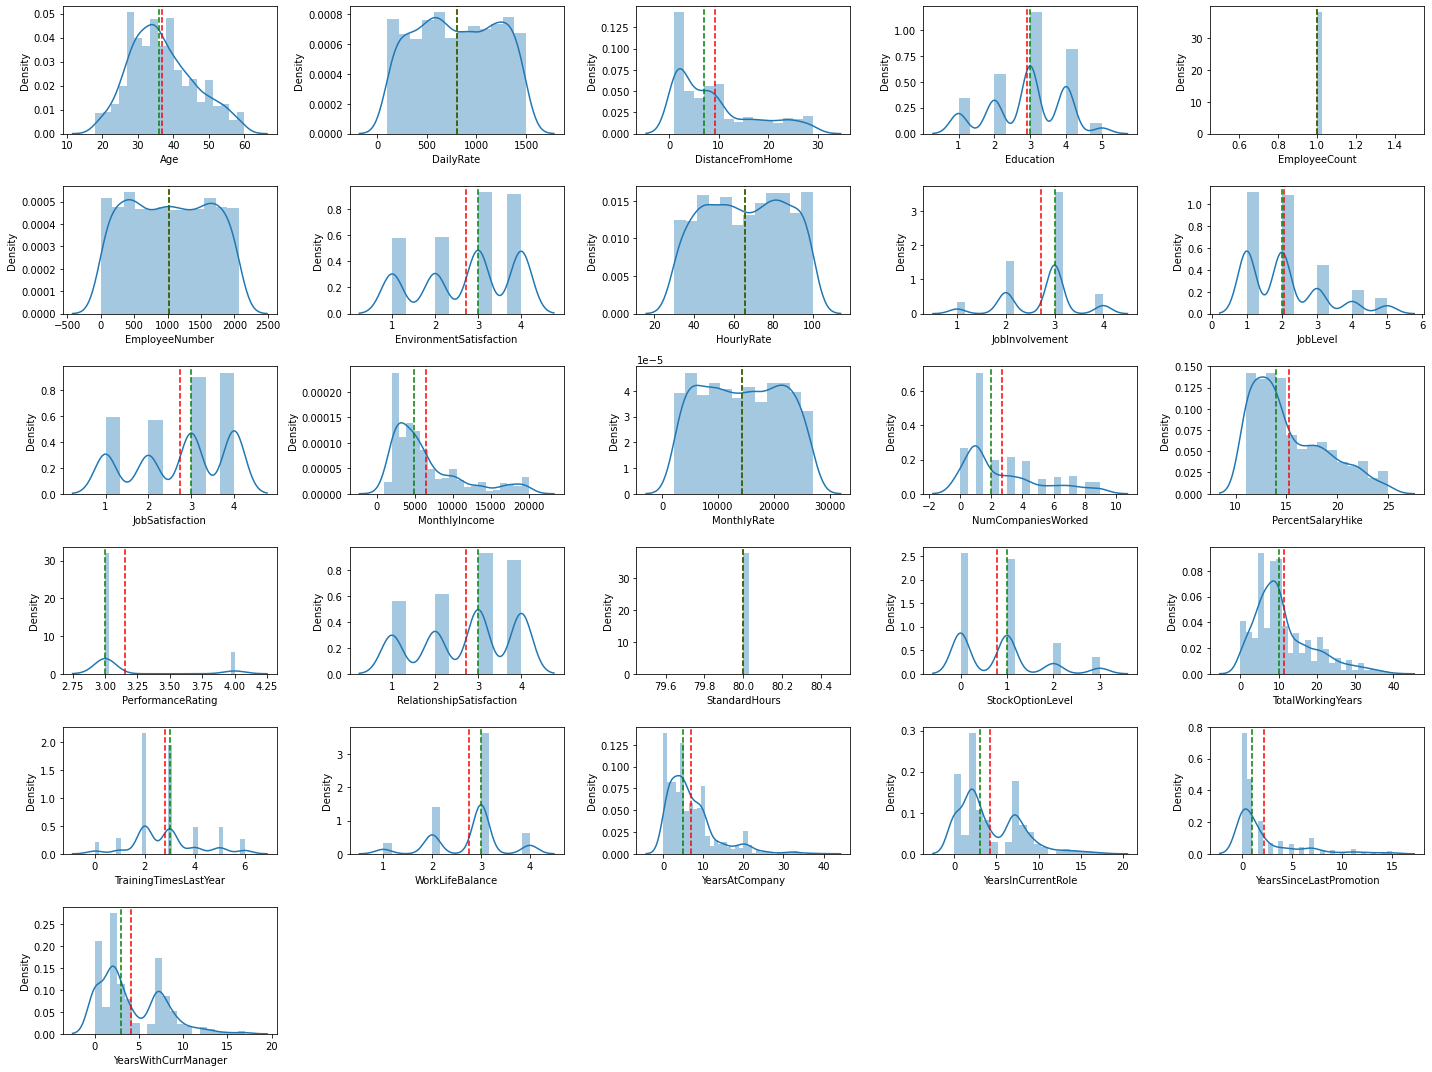

In [ ]:
# Plot the histograms
# YOUR CODE HERE

def make_distplot(df, col, ax):
    sns.distplot(df[col], ax = ax)
    ax.axvline(df[col].mean(), linestyle = '--', color = "red")
    ax.axvline(df[col].median(), linestyle = '--', color = "green")
fig, ax = plt.subplots(6,5, figsize = (20,15))


ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(df, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*5):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 5))
plt.tight_layout()


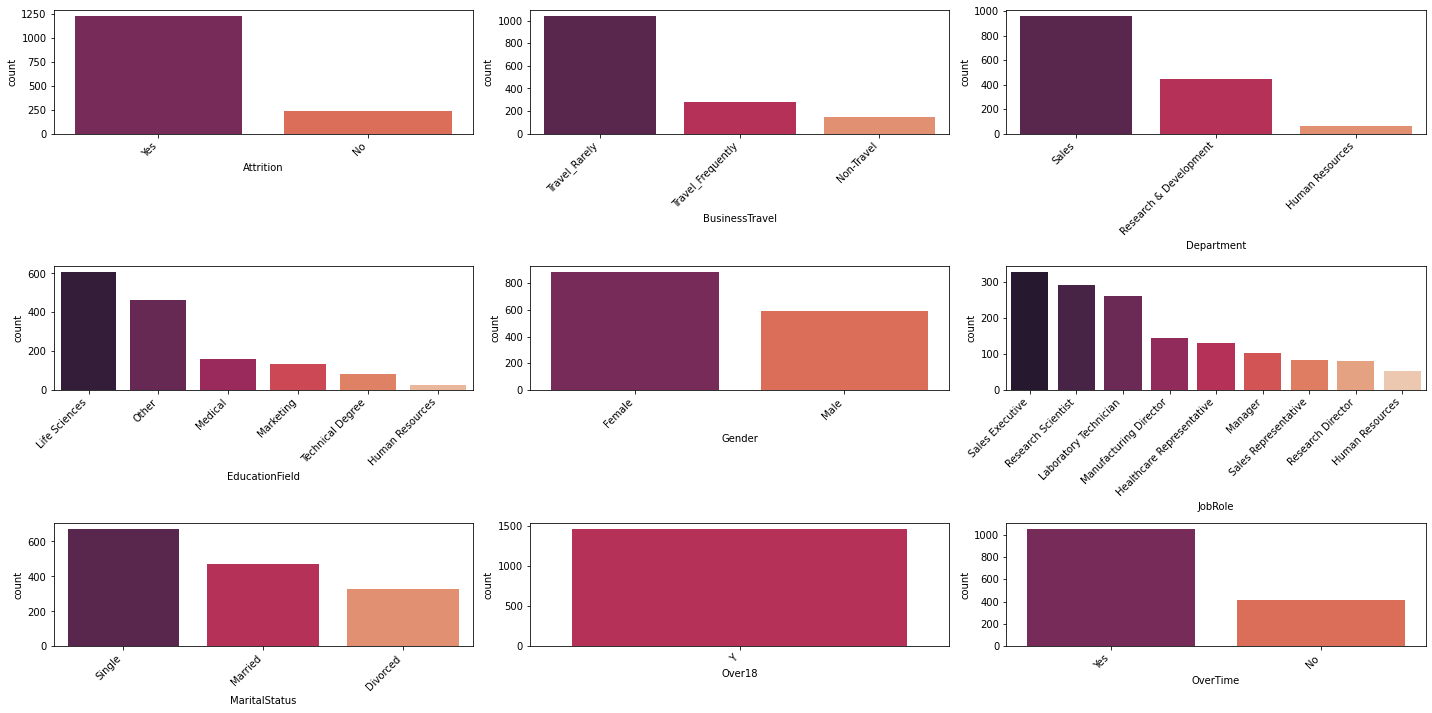

In [ ]:
# Plot the bar Plots
# YOUR CODE HERE
fig, ax = plt.subplots(3,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], ax = ax[i], palette="rocket", order = df[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

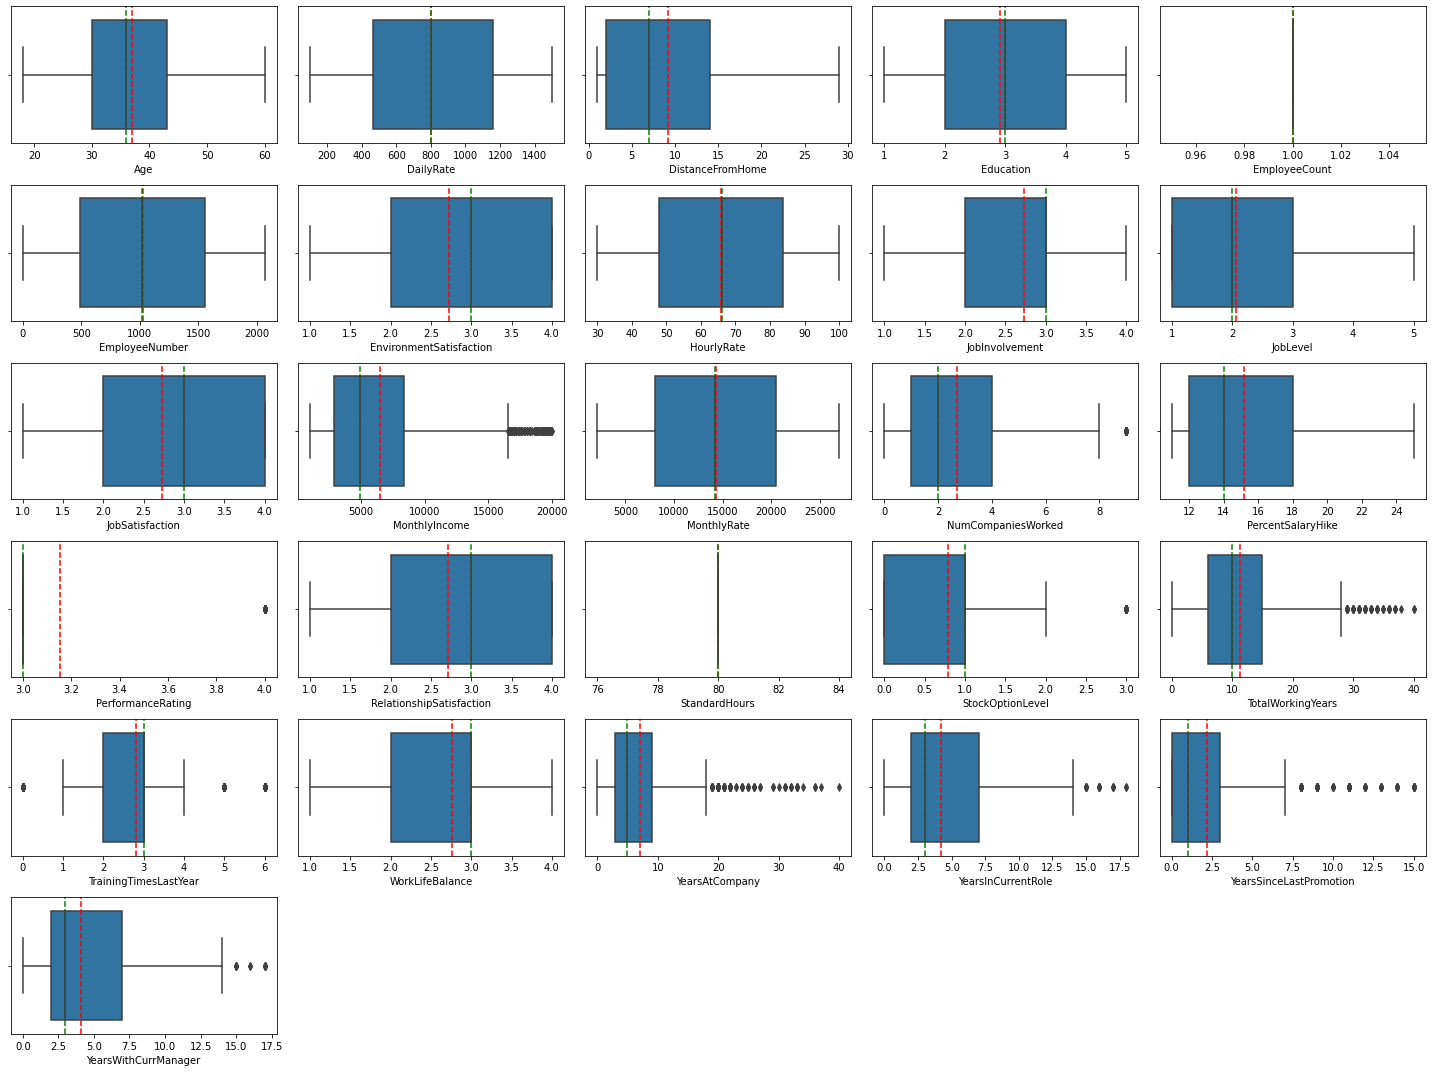

In [ ]:
# Plot the Categorical Plots
# YOUR CODE HERE

def make_boxplot(df, col, ax):
    sns.boxplot(df[col], ax = ax)
    ax.axvline(df[col].mean(), linestyle = '--', color = "red")
    ax.axvline(df[col].median(), linestyle = '--', color = "green")
fig, ax = plt.subplots(6,5, figsize = (20,15))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_boxplot(df, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*5):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 5))
plt.tight_layout()

### Exercise 3 (2 points): Feature Engineering 

- Fill the missing values:
  - numerical: With mean
  - categorical: with `Others`/Suitable name as appropriate
- Identify and list the Categorical features which needs to be bucketized in discrete Bins
- Convert the Text categories into Numerical values using `pandas`'s '`Normalizer`'
- Ensure that entire dataset has **Numerical values Only**

In [ ]:
# Check for Null and if any, replace with mean
# YOUR CODE HERE
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Convert the Text categories into Numerical Categories
# YOUR CODE HERE
df_2 = df.copy()
df_2['Attrition'] = df_2['Attrition'].apply(lambda x: 0 if x=='No' else 1)
df_2['Gender'] = df_2['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df_2['OverTime'] = df_2['OverTime'].apply(lambda x: 0 if x=='No' else 1)

BusinessTravel_map = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
df_2['BusinessTravel'] = df_2['BusinessTravel'].map(BusinessTravel_map)

MaritalStatus_map = {'Single':0, 'Divorced':1, 'Married':2}
df_2['MaritalStatus'] = df_2['MaritalStatus'].map(MaritalStatus_map)

EducationField_map = {'Other':0, 'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,
                     'Human Resources':5}
df_2['EducationField'] = df_2['EducationField'].map(EducationField_map)

JobRole_map = {'Sales Executive':0,'Sales Representative':1,'Laboratory Technician':2,'Manufacturing Director':3,
              'Healthcare Representative':4,'Manager':5,'Research Scientist':6,'Research Director':7,'Human Resources':8}
df_2['JobRole'] = df_2['JobRole'].map(JobRole_map)

Department_map = {'Sales':0, 'Research & Development':1, 'Human Resources':2}
df_2['Department'] = df_2['Department'].map(Department_map)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Identify and list the features and target which needs to be bucketized in discrete Bins
# YOUR CODE HERE
df_2 = df_2.drop(["Over18", "EmployeeCount", "StandardHours"], axis=1)
X = df_2.loc[:, df_2.columns != "Attrition"].copy()
y = df_2.loc[:, "Attrition"].copy()

In [ ]:
# Normalization
# YOUR CODE HERE
# Check for variables with skew above 0.75
skew_limit = 0.75
skew_vals = df_2.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

display(skew_cols.style.set_caption('Columns to be log-transformed:'))
for i in skew_cols.index.values:
    df_2[i] = df_2[i].apply(np.log1p)


from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

,Skew
YearsSinceLastPromotion,1.984290
PerformanceRating,1.921883
Attrition,1.844366
YearsAtCompany,1.764529
MonthlyIncome,1.369817
TotalWorkingYears,1.117172
NumCompaniesWorked,1.026471
JobLevel,1.025401
StockOptionLevel,0.968980
OverTime,0.964489


In [ ]:
# Ensure that entire dataset has Numerical values Only
# YOUR CODE HERE


### Exercise 4 (2 points): Data Preparation

 - Plot an annotated heatmap of the correlation
 - Drop highly correlated variables, if any
 - Split the data into training and testing
 - Check if the Target data is balanced/imbalanced

Text(0.5, 1.0, 'Correlation Graph')

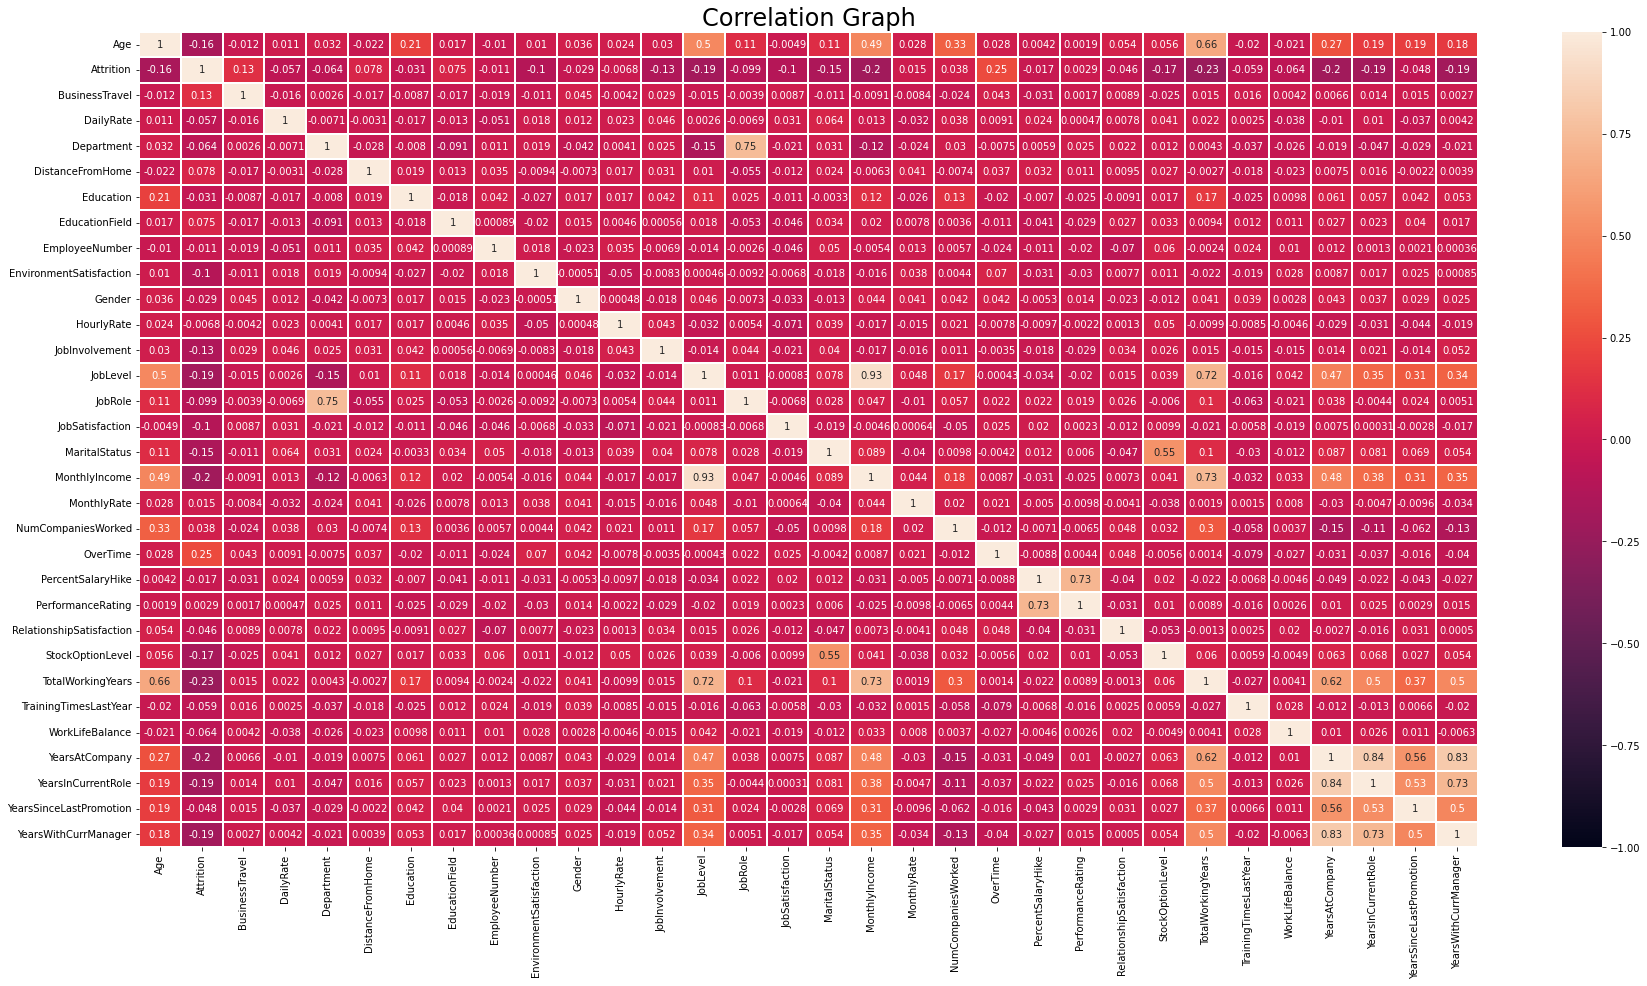

In [ ]:
# Plot an annotated heatmap of the correlation
# YOUR CODE HERE
plt.figure(figsize=(30,15))
correlation = sns.heatmap(df_2.corr(), vmin=-1, vmax=1, annot=True, linewidths=1)
correlation.set_title('Correlation Graph', fontdict={'fontsize': 24})

There are some obvious correlations among the numerical columns:
PercentSalaryHike and PerformanceRating are highly correlated

YearsInCurrentRole and YearsAtCompany are highly correlated

YearsWithCurrManager and YearsAtCompany are highly correlated

TotalWorkingYears and JobLevel are highly correlated

TotalWorkingYears and MonthlyIncome are highly correlated

MonthlyIncome and JobLevel are highly correlated

The longer you are working, the higher is the probability that you reached your "limit" in terms of promotion

In [ ]:
# Drop highly correlated variables, if any
# YOUR CODE HERE

df_2 = df_2.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
df_2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,0.693147,1,1102,0,0.693147,2,0.693147,1,2,...,19479,2.197225,0.693147,1.386294,1,0.000000,0,1,1.945910,0.000000
1,49,0.000000,2,279,1,2.197225,1,0.693147,2,3,...,24907,0.693147,0.000000,1.609438,4,0.693147,3,3,2.397895,0.693147
2,37,0.693147,1,1373,1,1.098612,2,0.000000,4,4,...,2396,1.945910,0.693147,1.386294,2,0.000000,3,3,0.000000,0.000000
3,33,0.000000,2,1392,1,1.386294,4,0.693147,5,4,...,23159,0.693147,0.693147,1.386294,3,0.000000,3,3,2.197225,1.386294
4,27,0.000000,1,591,1,1.098612,1,1.098612,7,1,...,16632,2.302585,0.000000,1.386294,4,0.693147,3,3,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.000000,2,884,1,3.178054,2,1.098612,2061,3,...,12290,1.609438,0.000000,1.386294,3,0.693147,3,3,1.791759,0.000000
1466,39,0.000000,1,613,1,1.945910,1,1.098612,2062,4,...,21457,1.609438,0.000000,1.386294,1,0.693147,5,3,2.079442,0.693147
1467,27,0.000000,1,155,1,1.609438,3,0.693147,2064,2,...,5174,0.693147,0.693147,1.609438,2,0.693147,0,3,1.945910,0.000000
1468,49,0.000000,2,1023,0,1.098612,3,1.098612,2065,4,...,13243,1.098612,0.000000,1.386294,4,0.000000,3,2,2.302585,0.000000


In [ ]:
# Split the data into training and testing
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True)


In [ ]:
# Check if the Target data is balanced/imbalanced
# YOUR CODE HERE
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Exercise 6 (2 point) : Building ML models

- Build any 3 `sklearn`'s classifiers of your choice
- Train and fit on the Training Data
- Predict on the Test Data

**Hint**: Train the model and predict on seperate cells. It will save time debugging.

In [ ]:
# MODEL 1

# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
# Parameter tuning
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc', 
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

Grid Search CV Best AUC = 0.815
Best Params: RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=8, n_estimators=400, random_state=92)


In [ ]:
rf_cv_pred=rf_cv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_cv_pred))

Accuracy: 0.8722826086956522


In [ ]:
# MODEL 2

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [ ]:
logreg_pred = logreg.predict(X_test)  
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred))

Accuracy: 0.8804347826086957


In [ ]:
# MODEL 3

# YOUR CODE HERE
from sklearn.svm import SVC
svc=SVC(probability = True) # Default hyperparameters
svc.fit(X_train,y_train)


SVC(probability=True)

In [ ]:
svc_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,svc_pred))

Accuracy Score:
0.8967391304347826


### Exercise 6 (1 point) : Attrition Analysis

- Write a function to Compute the Classification metrics. 

The arguments of the function will be the true and predicted values of the `y` variable:
    - Print the Classification Report, 
    - Print the Confusion Matrix, 
    - Print the AUC metrics (or Plot ROC curves)

- Explain why one model behaves better than the other(s) in terms of Accuracy, Precision, Recall and F1-Score



In [ ]:
def att_analysis(ytrue, ypred, ypred_proba0, ypred_proba1):
  # Print the Classification Report
  print("="*30)
  print("CLASSIFICATION REPORT = ")
  print("="*30)
  # YOUR CODE HERE
  print(classification_report(ytrue, ypred ))


  # Print the Confusion Matrix
  print("="*30)
  print("CONFUSION MATRIX = ")
  print("="*30)
  # YOUR CODE HERE
  cnf_matrix = metrics.confusion_matrix(ytrue, ypred)
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  # Print the AUC metrics (or Plot ROC curves)
  print("="*30)
  print("AUC FOR CLASS 0 (NO) = ") #  or print("ROC CURVE : ") 
  print("="*30) 
  # YOUR CODE HERE
  plt.figure(2)
  fpr, tpr, _ = metrics.roc_curve(ytrue,  ypred_proba0)
  auc = metrics.roc_auc_score(ytrue, ypred_proba0)
  plt.plot(fpr,tpr,label="data 0, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  # Print the AUC metrics (or Plot ROC curves)
  print("="*30)
  print("AUC FOR CLASS 1 (YES) = ")#  or print("ROC CURVE : ") 
  print("="*30)   
  # YOUR CODE HERE
  plt.figure(3)
  fpr, tpr, _ = metrics.roc_curve(ytrue,  ypred_proba1)
  auc = metrics.roc_auc_score(ytrue, ypred_proba1)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()


CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.57      0.08      0.15        48

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       368
weighted avg       0.84      0.87      0.83       368

CONFUSION MATRIX = 
AUC FOR CLASS 0 (NO) = 


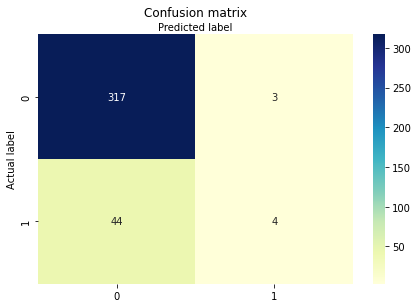

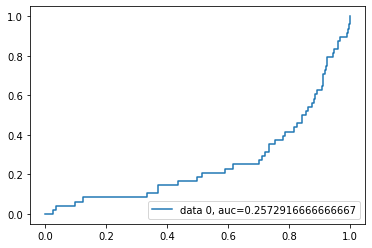

AUC FOR CLASS 1 (YES) = 


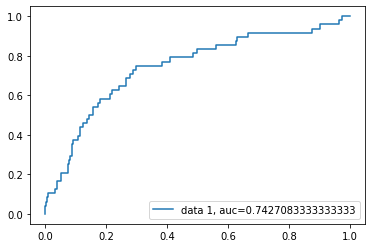

In [ ]:
# CLASSIFICATION METRICS- MODEL1
rf_cv_pred_proba0 = rf_cv.predict_proba(X_test)[::,0]
rf_cv_pred_proba1 = rf_cv.predict_proba(X_test)[::,1]
att_analysis(y_test, rf_cv_pred, rf_cv_pred_proba0, rf_cv_pred_proba1)

CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       320
           1       0.56      0.40      0.46        48

    accuracy                           0.88       368
   macro avg       0.74      0.67      0.70       368
weighted avg       0.87      0.88      0.87       368

CONFUSION MATRIX = 
AUC FOR CLASS 0 (NO) = 


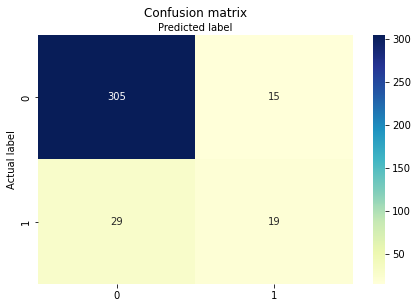

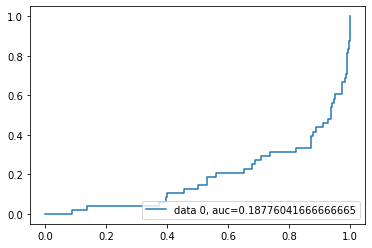

AUC FOR CLASS 1 (YES) = 


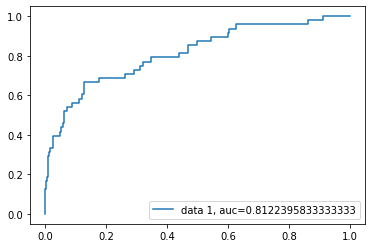

In [ ]:
# CLASSIFICATION METRICS- MODEL2
logreg_pred_proba0 = logreg.predict_proba(X_test)[::,0]
logreg_pred_proba1 = logreg.predict_proba(X_test)[::,1]

att_analysis(y_test, logreg_pred, logreg_pred_proba0, logreg_pred_proba1)

CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       320
           1       0.81      0.27      0.41        48

    accuracy                           0.90       368
   macro avg       0.86      0.63      0.67       368
weighted avg       0.89      0.90      0.87       368

CONFUSION MATRIX = 
AUC FOR CLASS 0 (NO) = 


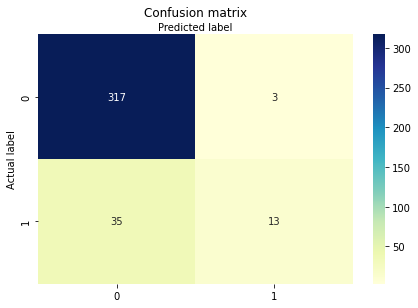

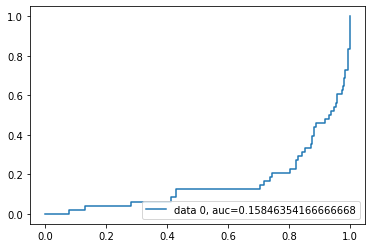

AUC FOR CLASS 1 (YES) = 


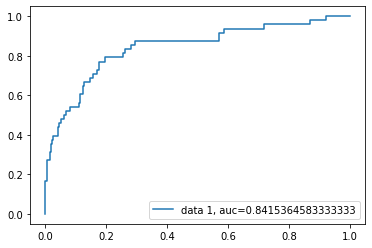

In [ ]:
# CLASSIFICATION METRICS- MODEL3
svc_pred_proba0 = svc.predict_proba(X_test)[::,0]
svc_pred_proba1 = svc.predict_proba(X_test)[::,1]

att_analysis(y_test, svc_pred, svc_pred_proba0, svc_pred_proba1)

#### YOUR FINDINGS/ Reasoning for which model is better and why (Qualitatively and Quantatively)

Explain why one model behaves better than the other(s) in terms of Accuracy, Precision, Recall and F1-Score

## Additional Ungraded Exercise for Practice:

- Try out for other ML Models